# Loading and visualising MNIST handwritten digits

In [1]:
import numpy as np
images = np.load('MNIST/mnist_images.npy')

In [2]:
print "Images shape is:", images.shape

Images shape is: (10000, 784)


In [3]:
import matplotlib.pyplot as plt

# A bit of matplotlib magic so that plots are visualised inside jupyter notebook
%matplotlib inline

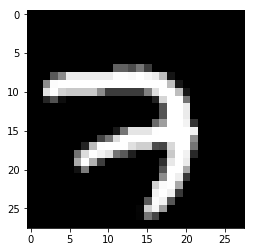

In [8]:
# Let's resize and plot the first image
img_matrix = images[0,:].reshape((28, 28))
plt.imshow(img_matrix, plt.get_cmap('gray'));

To train the classifier we also need to know the correct labels of each image. We will load them into a vector `labels`, which is called a **response** (or output) vector.

In [6]:
labels = np.load('MNIST/mnist_labels.npy')
print "Labels' shape is:", labels.shape

Labels' shape is: (10000,)


In [7]:
print ("Correct label of the first image is: ", labels[0])

Correct label of the first image is:  7


# Subsampling
Although in practice you typically want to use as much data as possible to train your models, large datasets are not very suitable for experimenting and visualization -- it is just too annoying to have to wait minutes for each step to continue. Thus, 10000 examples is a bit too much for our purposes, so why don't leave just 2000.

In [9]:
images = images[0:2000,:]
labels = labels[0:2000]

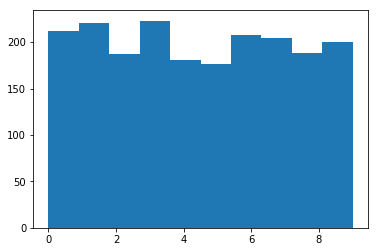

In [10]:
# We should make sure that the distribution is more or less uniform across our samples
plt.hist(labels);

Let's see some more examples from all classes.

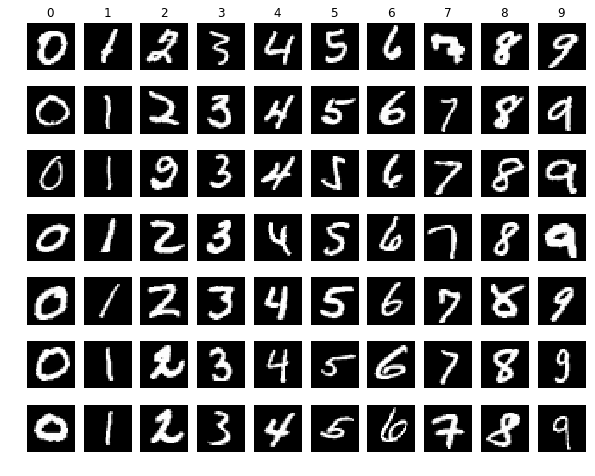

In [11]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# "Names" of classes:
classes =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

num_classes = len(classes)
samples_per_class = 7 # Number of images from each class we want to see
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(images[idx].reshape((28, 28)), plt.get_cmap('gray'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In principle, we would also like to somehow look at the data in **X**, but as it is 784-dimensional, there are no straightforward ways to visualize it "as-is". None the less, we should try to come up with some visualizations, as those are often key to forming some intuition about the data. Indeed, by visualizing the data you essentially "plug it" directly into your brain, the best pattern analysis machine we have so far.

Let us, for example, see how the 400-th attribute (a pixel somewhere in the center of the image) is distributed for different digits.

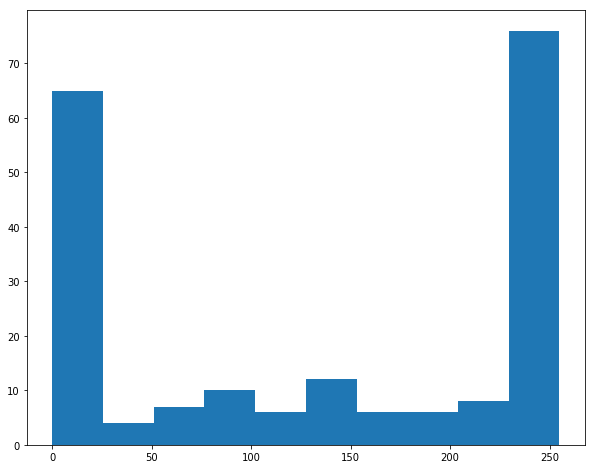

In [12]:
plt.hist(images[labels == 9, 400]);

In [13]:
# Need pandas to run these lines
import pandas as pd
d = {"pixel_value" : pd.Series(images[:,400]), "label" : pd.Series(labels)}
df = pd.DataFrame(d)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


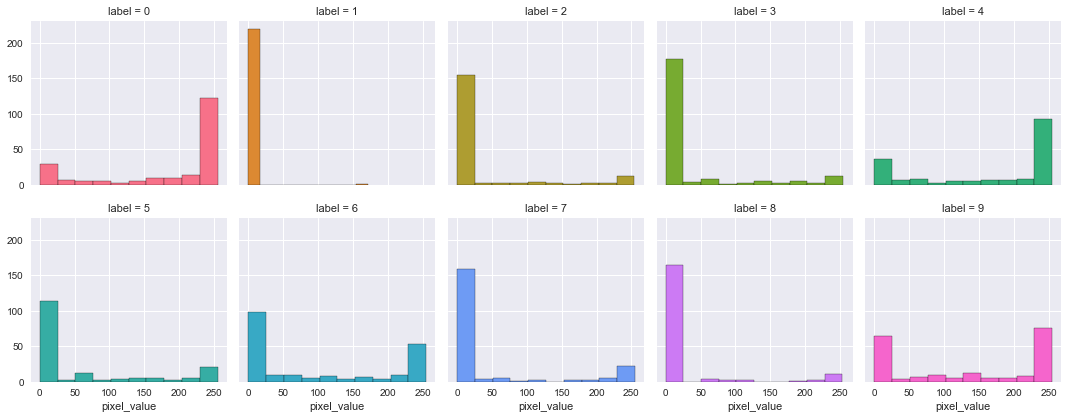

In [14]:
import seaborn as sns;
g = sns.FacetGrid(df, col="label", col_wrap=5, hue="label")
g = g.map(plt.hist, "pixel_value", edgecolor = "black");

## Working directly with images

How to read vectors from images

In [15]:
from PIL import Image
img = Image.open("7.png")
img_pixels = np.array([ord(char) for char in img.tobytes()])
img_pixels[300:340]

array([ 21,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  82,  13,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  34, 213,
       254, 254, 115,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

Here is how to save vector as image

In [16]:
from PIL import Image
img = Image.fromarray((images[0,:].reshape(28,28)).astype(np.uint8))
img.save('first_image.png')

In [17]:
from PIL import Image
seven = images[0,:]
seven[400] = 255
img = Image.fromarray((seven.reshape(28,28)).astype(np.uint8))
img.save('first_image_with_white.png')